In [1]:
import pandas as pd
import numpy as np

In [49]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [7]:
# set configuration
nr_moments = 5

# classificatio
test_size = 0.2
cv = 5
cv_config = [test_size, cv]

In [4]:
train _data = pd.read_csv('graphwave_ac_data.csv')
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0


In [303]:
a = data.iloc[1] != 0
b = data.iloc[0]
c = b[a]

(array([38.,  4.,  0.,  1.,  0.,  1.,  3.,  0.,  0.,  1.]),
 array([1.2679621e-08, 0.0242054514116589, 0.0484108901436968,
        0.07261632887573471, 0.09682176760777261, 0.12102720633981051,
        0.1452326450718484, 0.1694380838038863, 0.1936435225359242,
        0.2178489612679621, 0.2420544], dtype=object),
 <BarContainer object of 10 artists>)

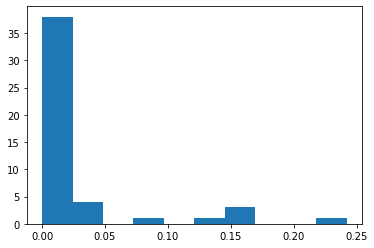

In [304]:
import matplotlib.pyplot as plt

plt.hist(c[:-1])

In [5]:
data['label'].unique()

array(['B5_0', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'C8_0', 'C8_1', 'C8_2',
       'C8_3', 'D5_0', 'D5_1', 'DB55_0', 'DB55_1', 'DS5_1', 'DS5_0',
       'H5_0', 'H5_1', 'H5_2', 'L5_0', 'L5_1', 'L5_2', 'L5_3', 'L5_4',
       'L5_5', 'L5_6', 'PB5_0', 'PB5_1', 'PB5_2', 'S5_0', 'S5_1', 'U5_0',
       'U5_1', 'U5_2', 'U5_3', 'U5_4', 'W5_0', 'W5_1', 'W5_2', 'W5_3'],
      dtype=object)

<AxesSubplot:>

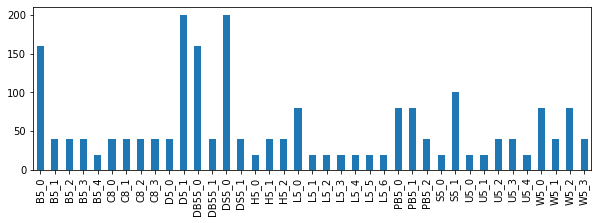

In [6]:
data['label'].value_counts().sort_index().plot(figsize=(10,3), kind='bar')

In [53]:
data['label'].value_counts()

D5_1      200
DS5_0     200
B5_0      160
DB55_0    160
S5_1      100
PB5_0      80
PB5_1      80
W5_2       80
L5_0       80
W5_0       80
B5_1       40
C8_0       40
C8_3       40
DS5_1      40
B5_3       40
H5_2       40
U5_3       40
D5_0       40
W5_3       40
B5_2       40
W5_1       40
C8_1       40
H5_1       40
DB55_1     40
U5_2       40
PB5_2      40
C8_2       40
L5_4       20
U5_0       20
H5_0       20
L5_1       20
B5_4       20
S5_0       20
U5_4       20
U5_1       20
L5_6       20
L5_5       20
L5_2       20
L5_3       20
Name: label, dtype: int64

In [8]:
moments_df = dem.get_moments_df(data,nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,label
0,0.000678,0.000095,0.000017,0.000003,6.645604e-07,B5_0
1,0.000601,0.000093,0.000017,0.000003,6.699010e-07,B5_0
2,0.000601,0.000093,0.000017,0.000003,6.699010e-07,B5_0


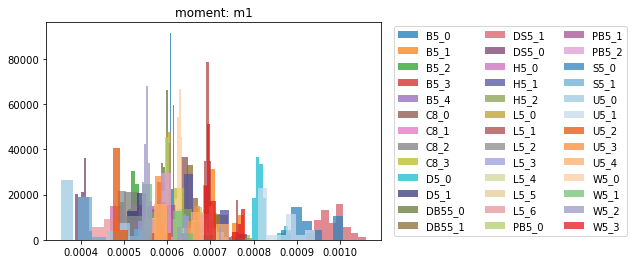

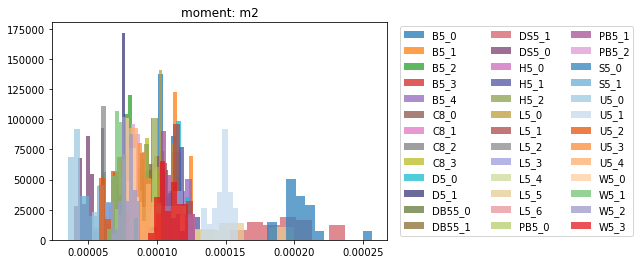

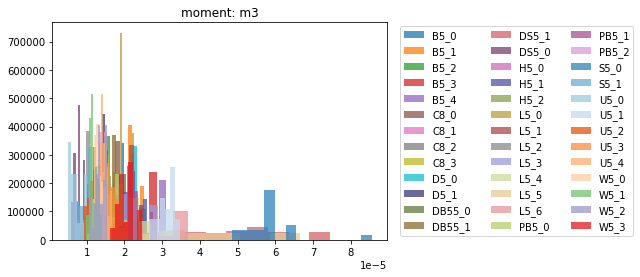

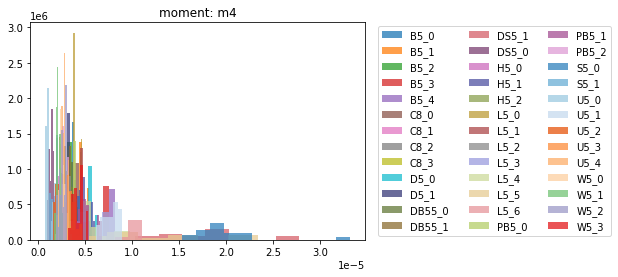

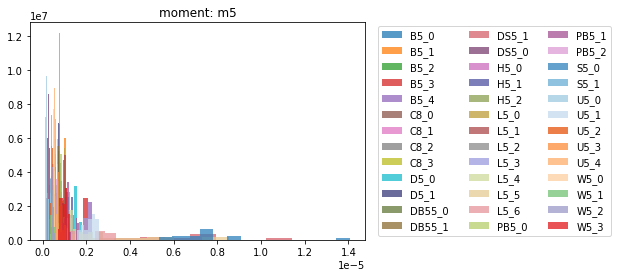

In [9]:
dem.get_histogram_of_moments(moments_df)

In [40]:
# setting values for cross validation
nr_moments_list = list(range(2,31))

In [52]:
res_svm = cm.cv_moments(nr_moments_list, data, cv_config, 1)

  0%|          | 0/29 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [50]:
res_lr = cm.cv_moments(nr_moments_list, data, cv_config, 2)

  0%|          | 0/29 [00:00<?, ?it/s]

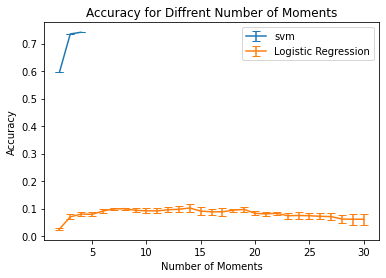

In [51]:
cm.plot_cv_moments(res_svm, res_lr, errbar=1)

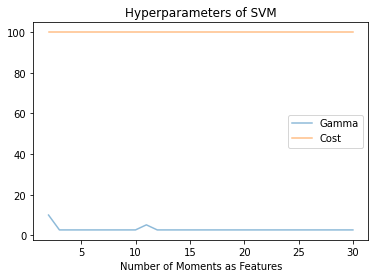

In [209]:
cm.plot_cv_h_params(res_svm)

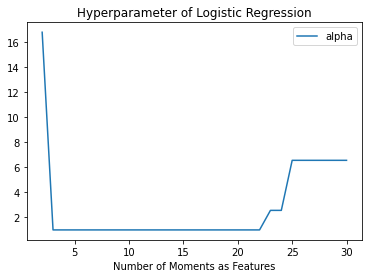

In [263]:
cm.plot_cv_h_params(res_lr)

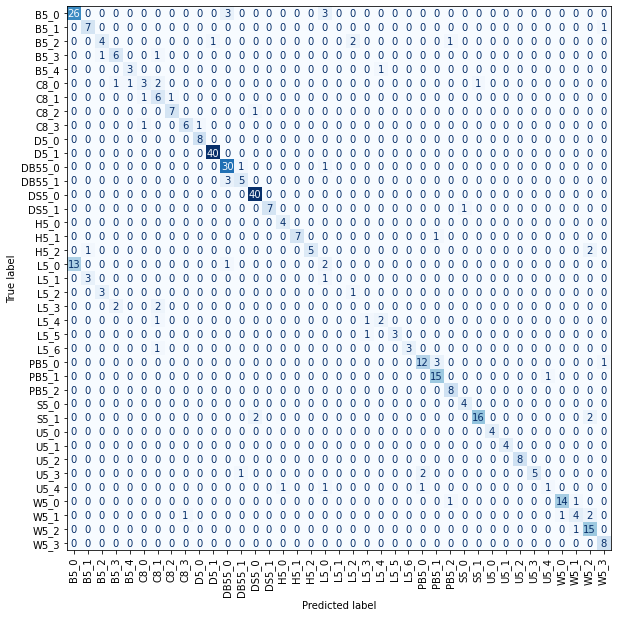

(array([0.80174927, 0.83090379, 0.83918129, 0.79824561, 0.80409357]),
 100.0,
 2.6826957952797246)

In [213]:
nr_moments = 4
moments_df = dem.get_moments_df(data,nr_moments)
cm.svm_model(moments_df, cv_config, plot=1 )

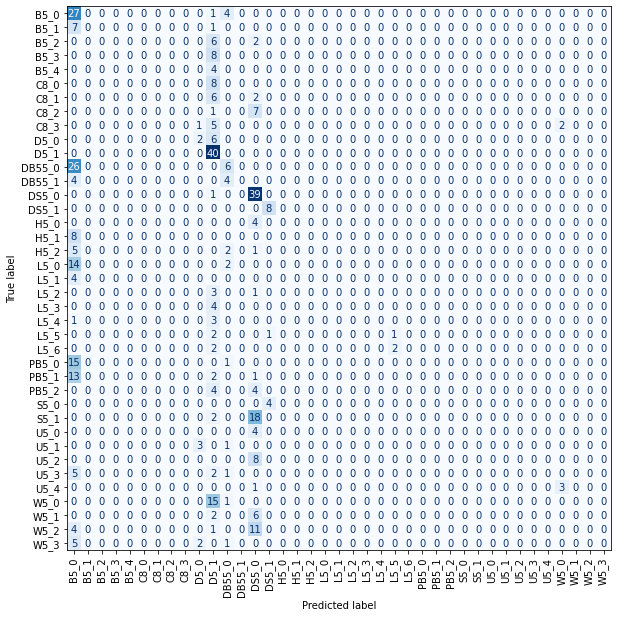

(array([0.27405248, 0.28862974, 0.30116959, 0.30116959, 0.28070175]), 1.0)

In [214]:
nr_moments = 17
moments_df = dem.get_moments_df(data,nr_moments)
cm.rr_model(moments_df, cv_config, plot=1 )

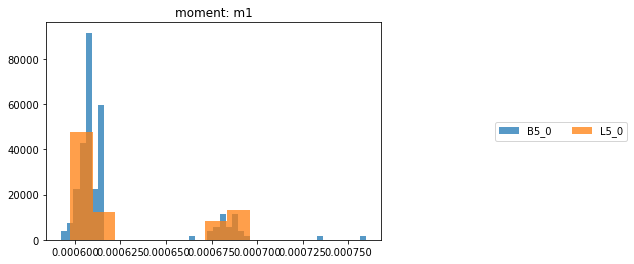

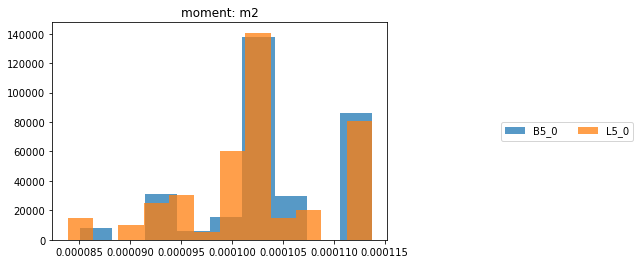

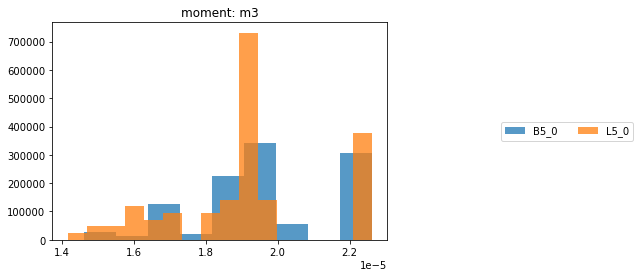

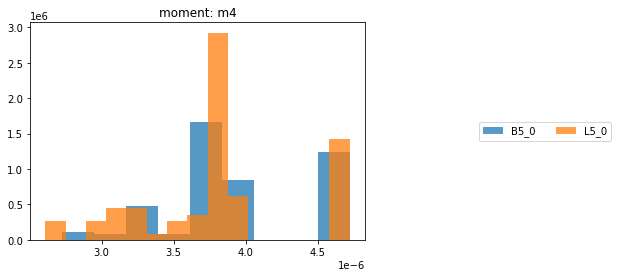

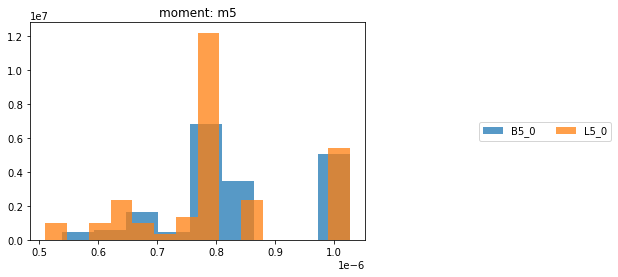

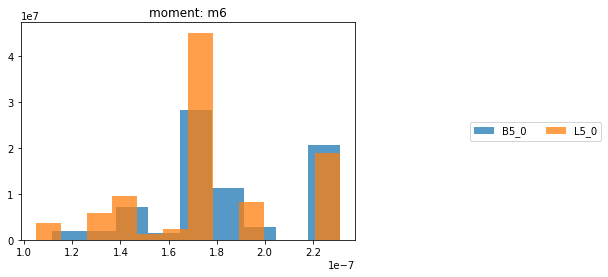

In [188]:
subset = moments_df.loc[(moments_df['label']== 'B5_0') | (moments_df['label']== 'L5_0')]
dem.get_histogram_of_moments(subset)

In [215]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential 
from keras import Input 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping

In [256]:
X, y, X_train, X_test, y_train, y_test = cm.prepare_data(moments_df, 0.2)

In [257]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [260]:
np.random.seed(100)
tf.random.set_seed(100)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(250, input_shape=(15,)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(39, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [261]:
import keras
 
es = EarlyStopping(monitor='val_loss', 
                   mode='min',
                   patience=10, 
                   restore_best_weights=True) 


history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=100, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
172/172 [==============================] - 2s 4ms/step - loss: 3.4939 - accuracy: 0.0783 - val_loss: 3.4289 - val_accuracy: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 1s 3ms/step - loss: 3.4029 - accuracy: 0.0789 - val_loss: 3.4028 - val_accuracy: 0.1168
Epoch 3/100
172/172 [==============================] - 1s 3ms/step - loss: 3.3973 - accuracy: 0.0888 - val_loss: 3.4058 - val_accuracy: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 1s 3ms/step - loss: 3.3936 - accuracy: 0.0929 - val_loss: 3.3952 - val_accuracy: 0.1168
Epoch 5/100
172/172 [==============================] - 1s 4ms/step - loss: 3.3918 - accuracy: 0.0794 - val_loss: 3.4201 - val_accuracy: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 1s 3ms/step - loss: 3.3893 - accuracy: 0.0917 - val_loss: 3.4001 - val_accuracy: 0.1168
Epoch 7/100
172/172 [==============================] - 1s 4ms/step - loss: 3.3924 - accuracy: 0.0911 - val_loss: 3.4305 - val_accu